In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
df_strc_init = pd.read_csv('../../datasets/datasets_prepped/strc_init.csv', index_col=0)

In [3]:
# Multiply these frequencies by the number of synthesized molecules to get the copy number distribution
copy_numbers = df_strc_init['count'].to_numpy()

# Sort copy numbers
copy_numbers = np.sort(copy_numbers)

Here is what the distribution of counts looks like in the initial library alone. 

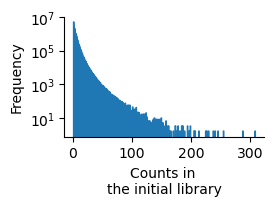

In [5]:
# Plot the distribution of copy numbers with the 99th percentile represented by a vertical line
axis_width, axis_height = 2, 1.2
left_margin, bottom_margin = 1, 1
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([left_margin / fig_width, bottom_margin / fig_height, axis_width / fig_width, axis_height / fig_height])

# Plot
sns.histplot(copy_numbers, bins=500, element='step', stat='frequency', alpha=1)

plt.yscale('log')
plt.xlabel('Counts in \nthe initial library')
sns.despine()

plt.show()
#plt.savefig('cpm_distribution_initial_expected.pdf')
#plt.savefig('cpm_distribution_initial_expected.svg')

Here are the nubmers:

In [6]:
# Get the min and max copy number if we consider the entire encoded sequence space
min_copy_number = copy_numbers.min()
max_copy_number = copy_numbers.max()

print(f'copy number min: {min_copy_number}')
print(f'copy number max: {max_copy_number}')
print(f'fold difference between most and least abundant:{max_copy_number / min_copy_number}')

copy number min: 1
copy number max: 309
fold difference between most and least abundant:309.0


Here is what it looks like when I drop various percentages of sequences from the right tail of the distribution.

In [7]:
thresholds = list(range(1, 51))

res = []

for i in range(0, len(thresholds)):
    x_perc = int((len(copy_numbers) / 100) * thresholds[i])
    copy_numbers_sub = copy_numbers[:-x_perc]
    res.append([thresholds[i], copy_numbers_sub.min(), copy_numbers_sub.max()])

df_res = pd.DataFrame(res, columns=['percent_shaved', 'min', 'max'])
df_res['range'] = df_res['max'] / df_res['min']

df_res

,percent_shaved,min,max,range
0,1,1,22,22.0
1,2,1,17,17.0
2,3,1,15,15.0
3,4,1,13,13.0
4,5,1,12,12.0
5,6,1,11,11.0
6,7,1,10,10.0
7,8,1,10,10.0
8,9,1,9,9.0
9,10,1,9,9.0


And here is the same distribution but with the vertical lines which represent these different cutoffs.

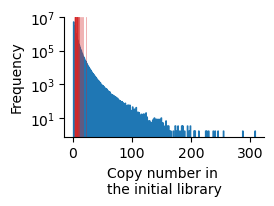

In [8]:
# Plot the distribution of copy numbers with the 99th percentile represented by a vertical line
axis_width, axis_height = 2, 1.2
left_margin, bottom_margin = 1, 1
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([left_margin / fig_width, bottom_margin / fig_height, axis_width / fig_width, axis_height / fig_height])

# Plot
sns.histplot(copy_numbers, bins=500, element='step', stat='frequency', alpha=1)

for index, row in df_res.iterrows():
    plt.axvline(row['max'], color='tab:red', alpha=0.5, linewidth=0.5)
    
plt.yscale('log')
plt.xlabel('Copy number in \nthe initial library')
sns.despine()

plt.show()